# Алиев Азнаур, Б01-909 

## ОДУ XI.9.3. a)

## Построить алгоритм метода пристрелки для вычисления решения следующей нелинейной задачи:

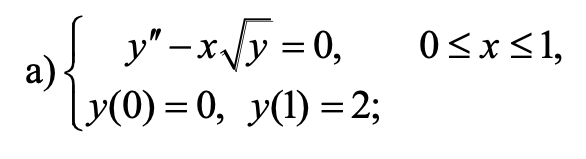

## Метод стрельбы: параметризуем начальное значение производной

## Имеем краевую задачу:
$$
\left\lbrace
\begin{matrix}
% y'' + px\cdot \cos{y} = 0, \:\: x \in \left( 0, 1\right] \\
% y(0) = 0\\
y'' - x\sqrt{y} = 0 \\
y'(0) = \alpha \\
y(0) = 0 \\
y(1) = 2
\end{matrix}
\right.
$$

## Разностная схема

$$
\frac{y_{k+1}\space - 2y_k + y_{k-1}}{h^2} - x\sqrt{y_k} = 0 \\
$$
$$
y_{k+1} = 2y_k - y_{k-1}\space + xh^2\sqrt{y_k} \\
$$
$$
Найдем\space y_{1}\spaceиз\spaceразложения\spaceпо\spaceТейлору\spaceв\space x=0:
$$
$$
y_{1} = y(0) + y'(0) \cdot h + y''(0) \cdot \frac{h^2}{2} + y'''(0)\cdot 
$$
$$
\\
$$
$$
y(0) = 0,\space y'(0) = \alpha,\space y''(0) = 0,\space y'''(0) = 0 \\
$$
$$
y_{1} = \alpha h
$$


In [125]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

In [153]:
eps = 1e-5
a = 0
b = 1
y_1 = 2

In [156]:
def grid(h, alpha):
    y = [0, h * alpha ]
    ypprev = 0
    yprev = y[1]
    for x in np.arange(a + h, b, h):
        ycur = 2*yprev - ypprev + x*h**2*np.sqrt(yprev)
        y.append(ycur)
        ypprev = yprev
        yprev = ycur

    return y

In [157]:
def newton(h, eps, alpha):
    y = grid(h, alpha)
    Fprev = y_1 - y[-1]
    aprev = alpha

    alpha += 1 if Fprev > 0 else -1
    diff = 2 * eps
    while diff >= eps:
        y = grid(h, alpha)
        F = Y1 - y[-1]
        dF = (F - Fprev) / (alpha - aprev)
        aprev = alpha
        Fprev = F

        diff = F / dF

        alpha = alpha - diff

        diff = abs(diff)

    return y, alpha

In [158]:
def draw(h, alpha):
    global alpha_fin
    y, alpha_fin = newton(h, eps, alpha)

    plt.figure(figsize=(10, 8), dpi=80)
    plt.plot(np.arange(a, b + h, h), y, color='green')
    plt.xlabel("$x$", fontsize=20)
    plt.ylabel("$y$", fontsize=20)
    plt.grid()
    plt.show()

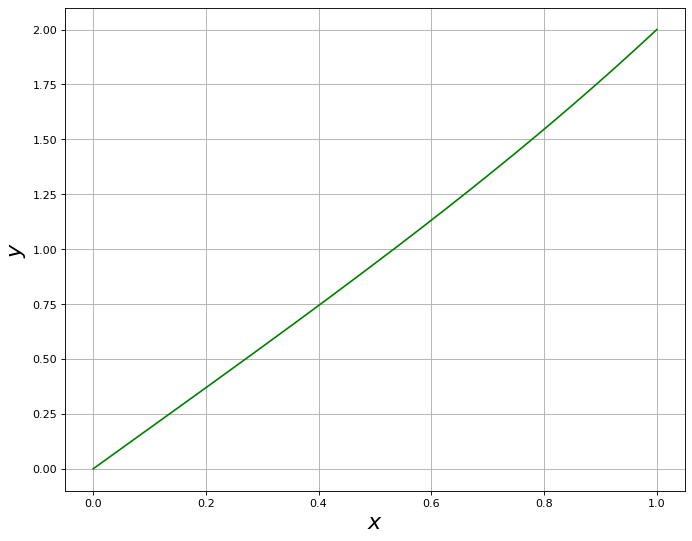

In [159]:
draw(1e-3, 10)

In [144]:
1/8*np.sqrt(alpha_fin/2) + alpha_fin

1.9629459757791552